In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#all possible combinations of start and end
startendset = ["LPstart","LPend","PYstart","PYend","PDstart","PDend"]
startendidxs = np.arange(6)

allcombos = np.zeros((720,6))
idx = 0

for a in range(6):
    arr1 = np.delete(startendidxs,a)
    for b in range(5):
        arr2 = np.delete(arr1,b)
        for c in range(4):
            arr3 = np.delete(arr2,c)
            for d in range(3):
                arr4 = np.delete(arr3,d)
                for e in range(2):
                    arr5 = np.delete(arr4,e)
                    allcombos[idx] = [startendidxs[a],arr1[b],arr2[c],arr3[d],arr4[e],arr5[0]]
                    idx += 1

In [39]:
#changed this cell to anchor the LP start instead of the PD start
#eliminate repeats  which are equivalent to each other up to wrap around
nonequivalentcombos = np.zeros((720,6))

for i in range(len(allcombos)):
    for j in range(6):
        if allcombos[i,j] != 0: #starting at the LPstart (No longer following paper convention)
            continue
        else:
            test = np.zeros(6)
            for k in range(6):
                test[k] = allcombos[i,(j+k)%6]
            print(allcombos[i],test)
            nonequivalentcombos[i] = test

nonequivalentcombos = np.unique(nonequivalentcombos,axis=0)
print(len(nonequivalentcombos))
#probably is something with 5!... oh well won't think about it 

[0. 1. 2. 3. 4. 5.] [0. 1. 2. 3. 4. 5.]
[0. 1. 2. 3. 5. 4.] [0. 1. 2. 3. 5. 4.]
[0. 1. 2. 4. 3. 5.] [0. 1. 2. 4. 3. 5.]
[0. 1. 2. 4. 5. 3.] [0. 1. 2. 4. 5. 3.]
[0. 1. 2. 5. 3. 4.] [0. 1. 2. 5. 3. 4.]
[0. 1. 2. 5. 4. 3.] [0. 1. 2. 5. 4. 3.]
[0. 1. 3. 2. 4. 5.] [0. 1. 3. 2. 4. 5.]
[0. 1. 3. 2. 5. 4.] [0. 1. 3. 2. 5. 4.]
[0. 1. 3. 4. 2. 5.] [0. 1. 3. 4. 2. 5.]
[0. 1. 3. 4. 5. 2.] [0. 1. 3. 4. 5. 2.]
[0. 1. 3. 5. 2. 4.] [0. 1. 3. 5. 2. 4.]
[0. 1. 3. 5. 4. 2.] [0. 1. 3. 5. 4. 2.]
[0. 1. 4. 2. 3. 5.] [0. 1. 4. 2. 3. 5.]
[0. 1. 4. 2. 5. 3.] [0. 1. 4. 2. 5. 3.]
[0. 1. 4. 3. 2. 5.] [0. 1. 4. 3. 2. 5.]
[0. 1. 4. 3. 5. 2.] [0. 1. 4. 3. 5. 2.]
[0. 1. 4. 5. 2. 3.] [0. 1. 4. 5. 2. 3.]
[0. 1. 4. 5. 3. 2.] [0. 1. 4. 5. 3. 2.]
[0. 1. 5. 2. 3. 4.] [0. 1. 5. 2. 3. 4.]
[0. 1. 5. 2. 4. 3.] [0. 1. 5. 2. 4. 3.]
[0. 1. 5. 3. 2. 4.] [0. 1. 5. 3. 2. 4.]
[0. 1. 5. 3. 4. 2.] [0. 1. 5. 3. 4. 2.]
[0. 1. 5. 4. 2. 3.] [0. 1. 5. 4. 2. 3.]
[0. 1. 5. 4. 3. 2.] [0. 1. 5. 4. 3. 2.]
[0. 2. 1. 3. 4. 5.] [0. 2. 1. 3. 4. 5.]


Really, the criteria are not specific enough to deal with this conception. I'd need to know what the actual biology is behind these choices. Is it important that there is an actual gap?

In [ ]:
# criteria = np.zeros((120,3))
# for i in range(len(nonequivalentcombos)):
#     #between LP's start and LP's end,
#     j = np.where(nonequivalentcombos[i]==0)[0]+1
#     #start by assuming that the PYend is not contained within the LP burst
#     criteria[i,1] = 1
#     while (j%6 < np.where(nonequivalentcombos[i]==1)[0]):
#         if nonequivalentcombos[i,j%6] == 2:
#             criteria[i,0] = 1 #LPstart<PYstart
#         if nonequivalentcombos[i,j%6] == 3:
#             criteria[i,1] = 0 #and turn off if proven false
#         j += 1
#     if np.where(nonequivalentcombos[i]==5)[0]<np.where(nonequivalentcombos[i]==0)[0]: #PDend < LPstart
#         criteria[i,2] = 1
# # print(criteria)
# print("no criteria met:",np.where((criteria == (0, 0, 0)).all(axis=1))[0])
# print("pyloric:",np.where((criteria == (1, 1, 1)).all(axis=1))[0])
# print(nonequivalentcombos[np.where((criteria == (1, 1, 1)).all(axis=1))[0]])

no criteria met: [12 13 16 22 50 51 53]
pyloric: [ 57  59  69  91  98 111 115]
[[4. 2. 1. 3. 5. 0.]
 [4. 2. 1. 5. 3. 0.]
 [4. 2. 5. 1. 3. 0.]
 [4. 3. 5. 0. 2. 1.]
 [4. 5. 0. 2. 1. 3.]
 [4. 5. 2. 1. 3. 0.]
 [4. 5. 3. 0. 2. 1.]]


In [ ]:
# #no burst fully contained within another
#     criteria[i,0] = 1 #default true
#     for n in range(3):
#         j = np.where(nonequivalentcombos[i,:] == n*2)[0][0] + 1
#         k = np.where(nonequivalentcombos[i,:] == (n**2+1))[0][0]
#         st_ed = np.zeros((2,2))
#         #are there two sequential numbers 
#         while (j%6) != k:
#             if nonequivalentcombos[i,j%6] == (n+1)%3:
#                 st_ed[0,0] = 1
#             if (nonequivalentcombos[i,j%6] == (n+1)%3 + 1) and st_ed[0,0]:
#                 st_ed[0,1] = 1
#             if nonequivalentcombos[i,j%6] == (n+2)%3:
#                 st_ed[1,0] = 1
#             if (nonequivalentcombos[i,j%6] == (n+2)%3 + 1) and st_ed[1,0]:
#                 st_ed[1,1] = 1
#             j += 1
#         if np.any((st_ed==(1,1)).all(axis=1)):
#             criteria[i,0] = 0 #until proven false

False


In [45]:
print(np.where((nonequivalentcombos==(0,2,1,5,3,4)).all(axis=1)))

(array([28]),)


In [53]:
#add the gap devoid of PY activity assumption and see if enough to specify pyloric-looking things
criteria = np.zeros((120,3))
#so more specifically, the criteria must be rewritten, from the perspective of LP as the start, ensuring no carry-over
#from that basis, you may assume that start<end for every neuron. 
for i in range(len(nonequivalentcombos)):
    #LPstart<PYstart falls out of this assumption, as does LPstart<LPend
    #LPend<PYend
    if np.where(nonequivalentcombos[i,:]==1)[0][0] < np.where(nonequivalentcombos[i,:]==3)[0][0]:
        criteria[i,0] = 1
    #PDstart<PDend
    if np.where(nonequivalentcombos[i,:]==4)[0][0] < np.where(nonequivalentcombos[i,:]==5)[0][0]:
        criteria[i,1] = 1
    #PYstart<LPend
    if np.where(nonequivalentcombos[i,:]==2)[0][0] < np.where(nonequivalentcombos[i,:]==1)[0][0]:
        criteria[i,2] = 1


print("no criteria met:",np.where((criteria == (0, 0, 0)).all(axis=1))[0])
print("pyloric:",np.where((criteria == (1, 1, 1)).all(axis=1))[0])
pyloriccombos = nonequivalentcombos[np.where((criteria == (1, 1, 1)).all(axis=1))[0]]
print(len(nonequivalentcombos[np.where((criteria == (1, 1, 1)).all(axis=1))[0]]))
print(pyloriccombos)

no criteria met: [ 49  52  53  66  67  70 108 109 112 118]
pyloric: [24 26 27 36 37 40 78 79 82 92]
10
[[0. 2. 1. 3. 4. 5.]
 [0. 2. 1. 4. 3. 5.]
 [0. 2. 1. 4. 5. 3.]
 [0. 2. 4. 1. 3. 5.]
 [0. 2. 4. 1. 5. 3.]
 [0. 2. 4. 5. 1. 3.]
 [0. 4. 2. 1. 3. 5.]
 [0. 4. 2. 1. 5. 3.]
 [0. 4. 2. 5. 1. 3.]
 [0. 4. 5. 2. 1. 3.]]


In [55]:
# pyloriccombos = nonequivalentcombos[np.where((criteria == (1, 1, 1)).all(axis=1))[0]]
for i in range(len(pyloriccombos)):
    for j in range(len(pyloriccombos)):
        if i > j:
            if sum(pyloriccombos[i]==pyloriccombos[j])==4: #if only two things are switched
                unequal = np.where(pyloriccombos[i]!=pyloriccombos[j])[0]
                if abs(unequal[0]-unequal[1])==1:
                    print("switched: ", i+1, ": ",pyloriccombos[i]," ",j+1,": ",pyloriccombos[j]) #and they were next to each other

switched:  2 :  [0. 2. 1. 4. 3. 5.]   1 :  [0. 2. 1. 3. 4. 5.]
switched:  3 :  [0. 2. 1. 4. 5. 3.]   2 :  [0. 2. 1. 4. 3. 5.]
switched:  4 :  [0. 2. 4. 1. 3. 5.]   2 :  [0. 2. 1. 4. 3. 5.]
switched:  5 :  [0. 2. 4. 1. 5. 3.]   3 :  [0. 2. 1. 4. 5. 3.]
switched:  5 :  [0. 2. 4. 1. 5. 3.]   4 :  [0. 2. 4. 1. 3. 5.]
switched:  6 :  [0. 2. 4. 5. 1. 3.]   5 :  [0. 2. 4. 1. 5. 3.]
switched:  7 :  [0. 4. 2. 1. 3. 5.]   4 :  [0. 2. 4. 1. 3. 5.]
switched:  8 :  [0. 4. 2. 1. 5. 3.]   5 :  [0. 2. 4. 1. 5. 3.]
switched:  8 :  [0. 4. 2. 1. 5. 3.]   7 :  [0. 4. 2. 1. 3. 5.]
switched:  9 :  [0. 4. 2. 5. 1. 3.]   6 :  [0. 2. 4. 5. 1. 3.]
switched:  9 :  [0. 4. 2. 5. 1. 3.]   8 :  [0. 4. 2. 1. 5. 3.]
switched:  10 :  [0. 4. 5. 2. 1. 3.]   9 :  [0. 4. 2. 5. 1. 3.]


In [ ]:
#this is the cell in which to figure out whether the fitness function we actually used conforms to the pyloric criteria
#we now believe to be the most logical
restricted_combos = np.zeros((3,6))
ignored_combos = np.zeros((4,6))
j= 0
k = 0
for i in range(len(pyloriccombos)):
    if np.where(pyloriccombos[i]==0)[0]<np.where(pyloriccombos[i]==2)[0]: #restricted means that PY has to end before LP starts
        restricted_combos[j] = pyloriccombos[i]
        j += 1
    else:
        ignored_combos[k] = pyloriccombos[i]
        k += 1

print(restricted_combos)
print(ignored_combos)

IndexError: index 3 is out of bounds for axis 0 with size 3

Which startend combos are actually represented in the data set of evolved solutions

In [42]:
all_archetypes = np.zeros((100,6))
phases = np.zeros((100,6))
for i in range(100):
    ord = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricbursttimes.dat"%i)
    period = ord[-1]
    ord = ord[:-1] % period #deal with detection errors
    phases[i] = ord/period
    sorted_ord = np.sort(ord)
    # print(ord)

    archetype = np.zeros(len((ord)))
    for j in range(len(ord)):
        archetype[j] = np.where(ord == sorted_ord[j])[0]
    print(archetype)
    all_archetypes[i] = archetype
print(phases)
    

[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 1. 2.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]
[4. 3. 5. 0. 2. 1.]


In [10]:
print(all_archetypes)
print(np.where((all_archetypes[:] != [4,3,5,0,2,1]).all(axis=1)))

[[4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 1. 2.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0. 2. 1.]
 [4. 3. 5. 0.

In [11]:
plotcolors = ['blue','orange','green']
plotlabels = ['LP','PY','PD']

def drawpyloricarchetype(pyloriccombo):
    for i in range(3):
        start = np.where(pyloriccombo==2*i)[0][0]
        end = np.where(pyloriccombo==(2*i)+1)[0][0]
        ptlist = np.zeros((12,2))
        #determine if end or start comes first
        if (start < end):
            ptlist[0] = np.array([0,0])
            ptlist[1] = np.array([start,0])
            ptlist[2] = np.array([start,1])
            ptlist[3] = np.array([end,1])
            ptlist[4] = np.array([end,0])
            ptlist[5] = np.array([6,0])
            ptlist[6:] = ptlist[0:6]
            ptlist[6:,0] = ptlist[6:,0]+6
        else:
            ptlist[0] = np.array([0,1])
            ptlist[1] = np.array([end,1])
            ptlist[2] = np.array([end,0])
            ptlist[3] = np.array([start,0])
            ptlist[4] = np.array([start,1])
            ptlist[5] = np.array([6,1])
            ptlist[6:] = ptlist[0:6]
            ptlist[6:,0] = ptlist[6:,0]+6
        plt.plot(ptlist[:,0],ptlist[:,1],color=plotcolors[i],alpha=.3,label=plotlabels[i])
    plt.legend()
    plt.show()

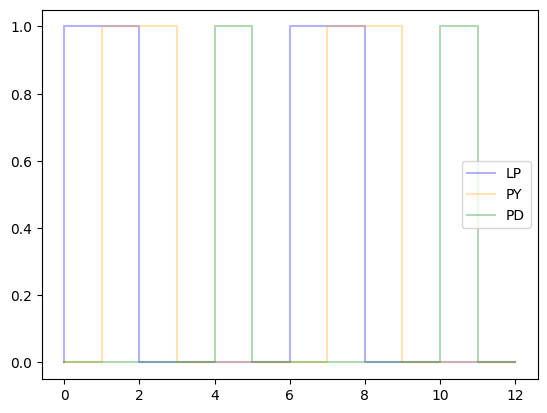

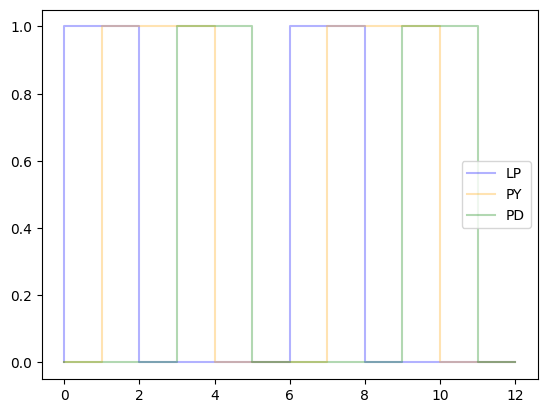

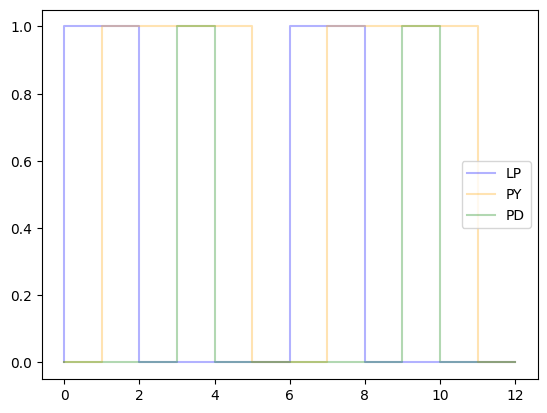

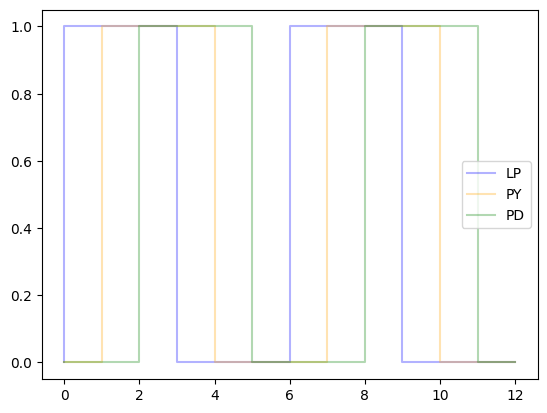

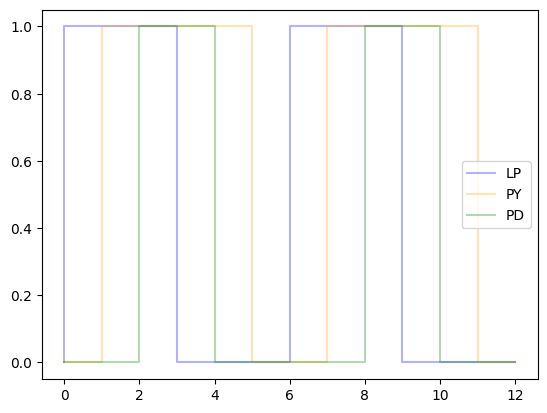

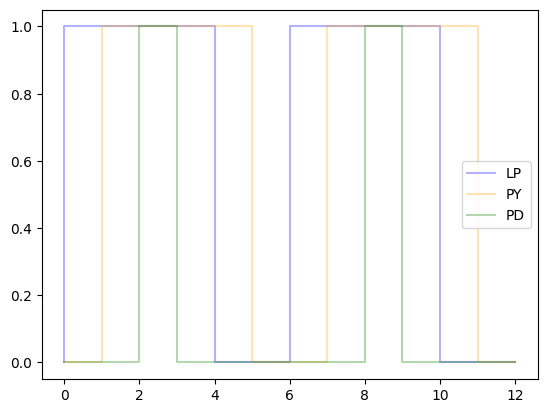

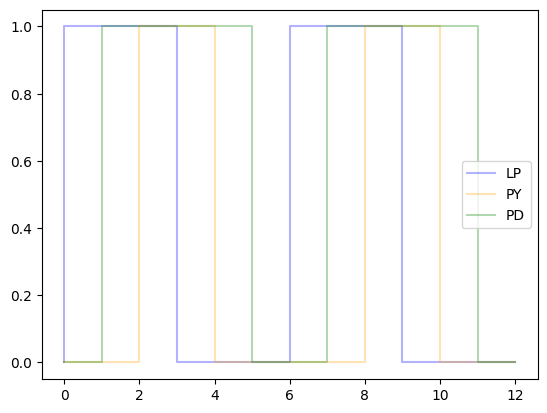

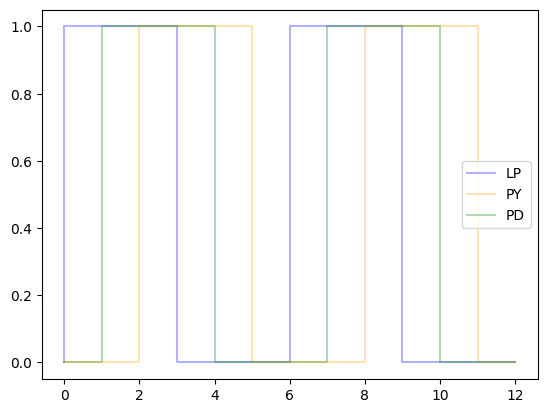

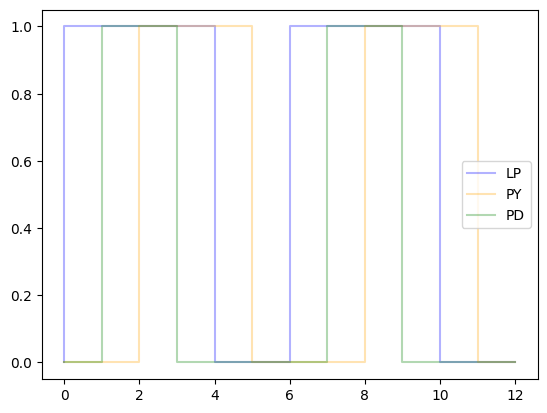

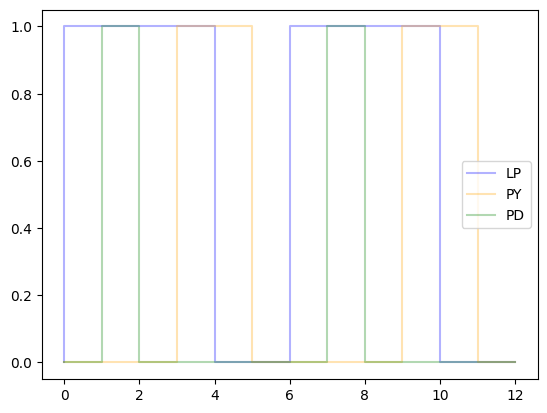

In [54]:
for i in range(len(pyloriccombos)):
    drawpyloricarchetype(pyloriccombos[i])

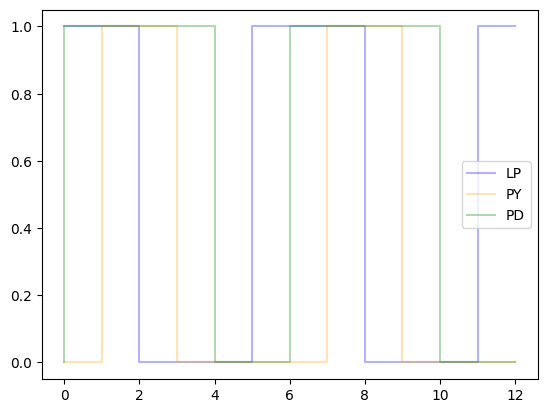

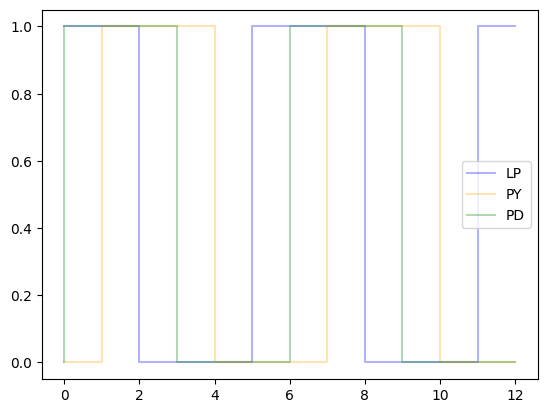

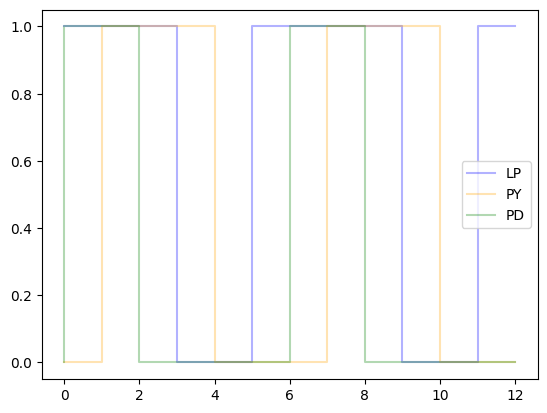

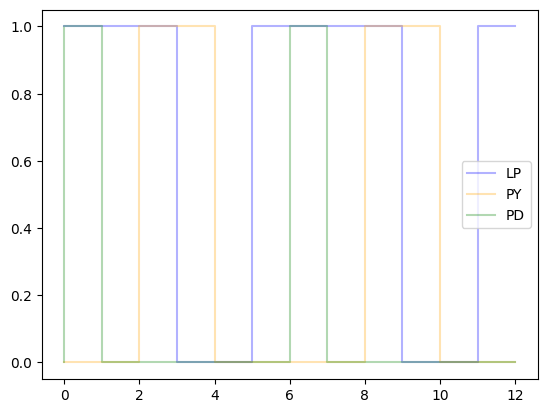

In [13]:
for i in range(len(ignored_combos)):
    drawpyloricarchetype(ignored_combos[i])

Plot averages and error bars for the space of evolved solutions, for comparison to paper data like Hooper, 1997 and Rabbah & Nadim, 2005

In [24]:
print(np.min(phases[:,2]))
print(np.max(phases[:,3]))

0.715258855585831
0.1431297709923664


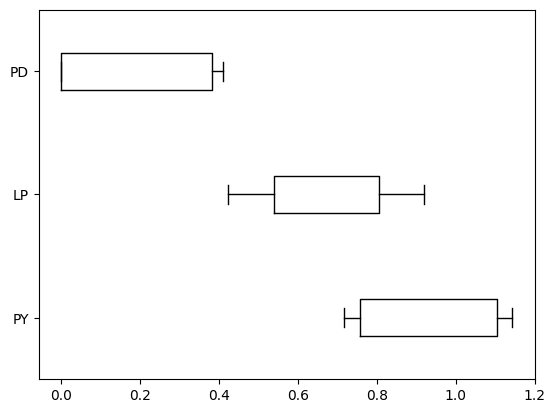

In [27]:
stats = [
    {'med': np.average(phases[:,2]), 'q1': np.average(phases[:,2]), 'q3': np.average(phases[:,3])+1, 'whislo': np.min(phases[:,2]), 'whishi': np.max(phases[:,3])+1,'label':'PY'},  #PY
    {'med': np.average(phases[:,0]), 'q1': np.average(phases[:,0]), 'q3': np.average(phases[:,1]), 'whislo': np.min(phases[:,0]), 'whishi': np.max(phases[:,1]),'label':'LP'}, #LP
    {'med': np.average(phases[:,4]), 'q1': np.average(phases[:,4]), 'q3': np.average(phases[:,5]), 'whislo': np.min(phases[:,4]), 'whishi': np.max(phases[:,5]),'label':'PD'} #PD   
]

_, ax = plt.subplots();
ax.bxp(stats,showfliers=False,vert=False,medianprops={'linewidth': 0})
plt.show()